#### Importing

In [12]:
import pandas as pd
import numpy as np

In [14]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

In [3]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import pickle
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [10]:
df=pd.read_csv("phone_usage_india.csv")
df.head()

,User ID,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use
0,U00001,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education
1,U00002,60,Other,Delhi,Realme,iOS,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming
2,U00003,37,Female,Ahmedabad,Nokia,Android,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment
3,U00004,32,Male,Pune,Samsung,Android,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment
4,U00005,16,Male,Mumbai,Xiaomi,iOS,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User ID                       17686 non-null  object 
 1   Age                           17686 non-null  int64  
 2   Gender                        17686 non-null  object 
 3   Location                      17686 non-null  object 
 4   Phone Brand                   17686 non-null  object 
 5   OS                            17686 non-null  object 
 6   Screen Time (hrs/day)         17686 non-null  float64
 7   Data Usage (GB/month)         17686 non-null  float64
 8   Calls Duration (mins/day)     17686 non-null  float64
 9   Number of Apps Installed      17686 non-null  int64  
 10  Social Media Time (hrs/day)   17686 non-null  float64
 11  E-commerce Spend (INR/month)  17686 non-null  int64  
 12  Streaming Time (hrs/day)      17686 non-null  float64
 13  G

In [9]:
df.describe()

,Age,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR)
count,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000
mean,37.584247,6.546376,25.411257,151.405846,104.584869,3.252369,5075.707848,4.250616,2.490874,1042.785367
std,13.338252,3.172677,14.122167,84.923353,55.217097,1.590223,2871.604841,2.155683,1.446003,552.502067
min,15.000000,1.000000,1.000000,5.000000,10.000000,0.500000,100.000000,0.500000,0.000000,100.000000
25%,26.000000,3.800000,13.200000,77.325000,57.000000,1.900000,2587.500000,2.400000,1.200000,561.000000
50%,38.000000,6.600000,25.300000,150.600000,104.000000,3.200000,5052.000000,4.200000,2.500000,1040.000000
75%,49.000000,9.300000,37.600000,223.900000,152.000000,4.600000,7606.000000,6.100000,3.700000,1521.750000
max,60.000000,12.000000,50.000000,300.000000,200.000000,6.000000,10000.000000,8.000000,5.000000,2000.000000


In [10]:
df.isnull().sum()

User ID                         0
Age                             0
Gender                          0
Location                        0
Phone Brand                     0
OS                              0
Screen Time (hrs/day)           0
Data Usage (GB/month)           0
Calls Duration (mins/day)       0
Number of Apps Installed        0
Social Media Time (hrs/day)     0
E-commerce Spend (INR/month)    0
Streaming Time (hrs/day)        0
Gaming Time (hrs/day)           0
Monthly Recharge Cost (INR)     0
Primary Use                     0
dtype: int64

In [11]:
df[['Phone Brand','OS']]

,Phone Brand,OS
0,Vivo,Android
1,Realme,iOS
2,Nokia,Android
3,Samsung,Android
4,Xiaomi,iOS
...,...,...
17681,Apple,iOS
17682,Oppo,iOS
17683,Realme,Android
17684,Vivo,Android


In [12]:
df['Phone Brand'].value_counts()

Phone Brand
Nokia           1816
OnePlus         1807
Xiaomi          1803
Vivo            1797
Apple           1775
Samsung         1764
Realme          1762
Google Pixel    1729
Motorola        1717
Oppo            1716
Name: count, dtype: int64

In [13]:
andriod_brands = ['Nokia','OnePlus','Xiaomi','Vivo','Samsung','Realme','Google Pixel','Motorola','Oppo']
df.loc[df['Phone Brand'].isin(andriod_brands),'OS']='Andriod'

In [14]:
df.loc[df['Phone Brand'] == 'Apple', 'OS'] = 'iOS'

#### #feature engineering

In [15]:
df['Age'].max(),df['Age'].min()

(60, 15)

In [16]:
df['AgeGroup'] = df['Age'].apply(
    lambda age:"Teen" if (age>14) & (age<18) else
                "Adult" if (age>18) & (age<35) else
                "Middle Aged" if (age>35) & (age<55) else
                "Old" 
)

In [17]:
df['AgeGroup'].value_counts()

AgeGroup
Middle Aged    7327
Adult          6110
Old            3085
Teen           1164
Name: count, dtype: int64

In [18]:
df['Age'].value_counts()

Age
58    438
54    423
19    418
36    411
46    410
50    407
47    403
22    402
40    401
16    400
28    397
52    397
24    396
15    396
48    392
41    390
35    390
59    390
21    388
57    387
30    386
25    385
56    385
51    383
37    379
39    378
49    378
55    377
23    376
34    375
31    375
53    375
44    375
33    374
26    371
20    370
17    368
32    367
45    366
29    365
27    365
60    359
18    359
42    356
38    356
43    347
Name: count, dtype: int64

In [19]:
df=df.drop(columns='Age',axis=1)

In [20]:
#Total Entertainment
df['Total Entertainment'] = df['Social Media Time (hrs/day)']+df['Streaming Time (hrs/day)']+df['Gaming Time (hrs/day)']

In [21]:
df['Apps per Hour Screen Time'] = df['Number of Apps Installed']/df['Screen Time (hrs/day)']

In [22]:
df['Ecom Spend per GB'] = df['E-commerce Spend (INR/month)']/df['Data Usage (GB/month)']

In [23]:
df['Recharge Cost per Hour'] = df ['Monthly Recharge Cost (INR)']/df['Screen Time (hrs/day)']

In [24]:
df['Data per Hour Screen Time'] = df['Data Usage (GB/month)'] / (df['Screen Time (hrs/day)'] * 30)

In [25]:
df.drop(columns=['Streaming Time (hrs/day)','Gaming Time (hrs/day)','Social Media Time (hrs/day)','User ID','Location','E-commerce Spend (INR/month)','Data Usage (GB/month)',
    'Monthly Recharge Cost (INR)'],inplace=True)

In [26]:
df

,Gender,Phone Brand,OS,Screen Time (hrs/day),Calls Duration (mins/day),Number of Apps Installed,Primary Use,AgeGroup,Total Entertainment,Apps per Hour Screen Time,Ecom Spend per GB,Recharge Cost per Hour,Data per Hour Screen Time
0,Male,Vivo,Andriod,3.7,37.9,104,Education,Middle Aged,13.2,28.108108,19.623431,217.027027,0.215315
1,Other,Realme,Andriod,9.2,13.7,169,Gaming,Old,8.3,18.369565,177.829181,165.869565,0.101812
2,Female,Nokia,Andriod,4.5,66.8,96,Entertainment,Middle Aged,7.6,21.333333,193.577236,359.777778,0.091111
3,Male,Samsung,Andriod,11.0,156.2,146,Entertainment,Adult,8.7,13.272727,46.289062,141.818182,0.077576
4,Male,Xiaomi,Andriod,2.2,236.2,86,Social Media,Teen,11.2,39.090909,42.400000,337.272727,0.037879
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17681,Other,Apple,iOS,7.2,90.4,81,Entertainment,Adult,12.2,11.250000,109.480874,191.666667,0.169444
17682,Female,Oppo,Andriod,9.5,243.0,166,Education,Middle Aged,8.4,17.473684,662.790698,23.368421,0.045263
17683,Female,Realme,Andriod,1.1,74.7,70,Entertainment,Adult,10.0,63.636364,112.801636,1465.454545,1.481818
17684,Male,Vivo,Andriod,8.8,105.6,96,Work,Adult,9.8,10.909091,141.171875,173.636364,0.096970


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

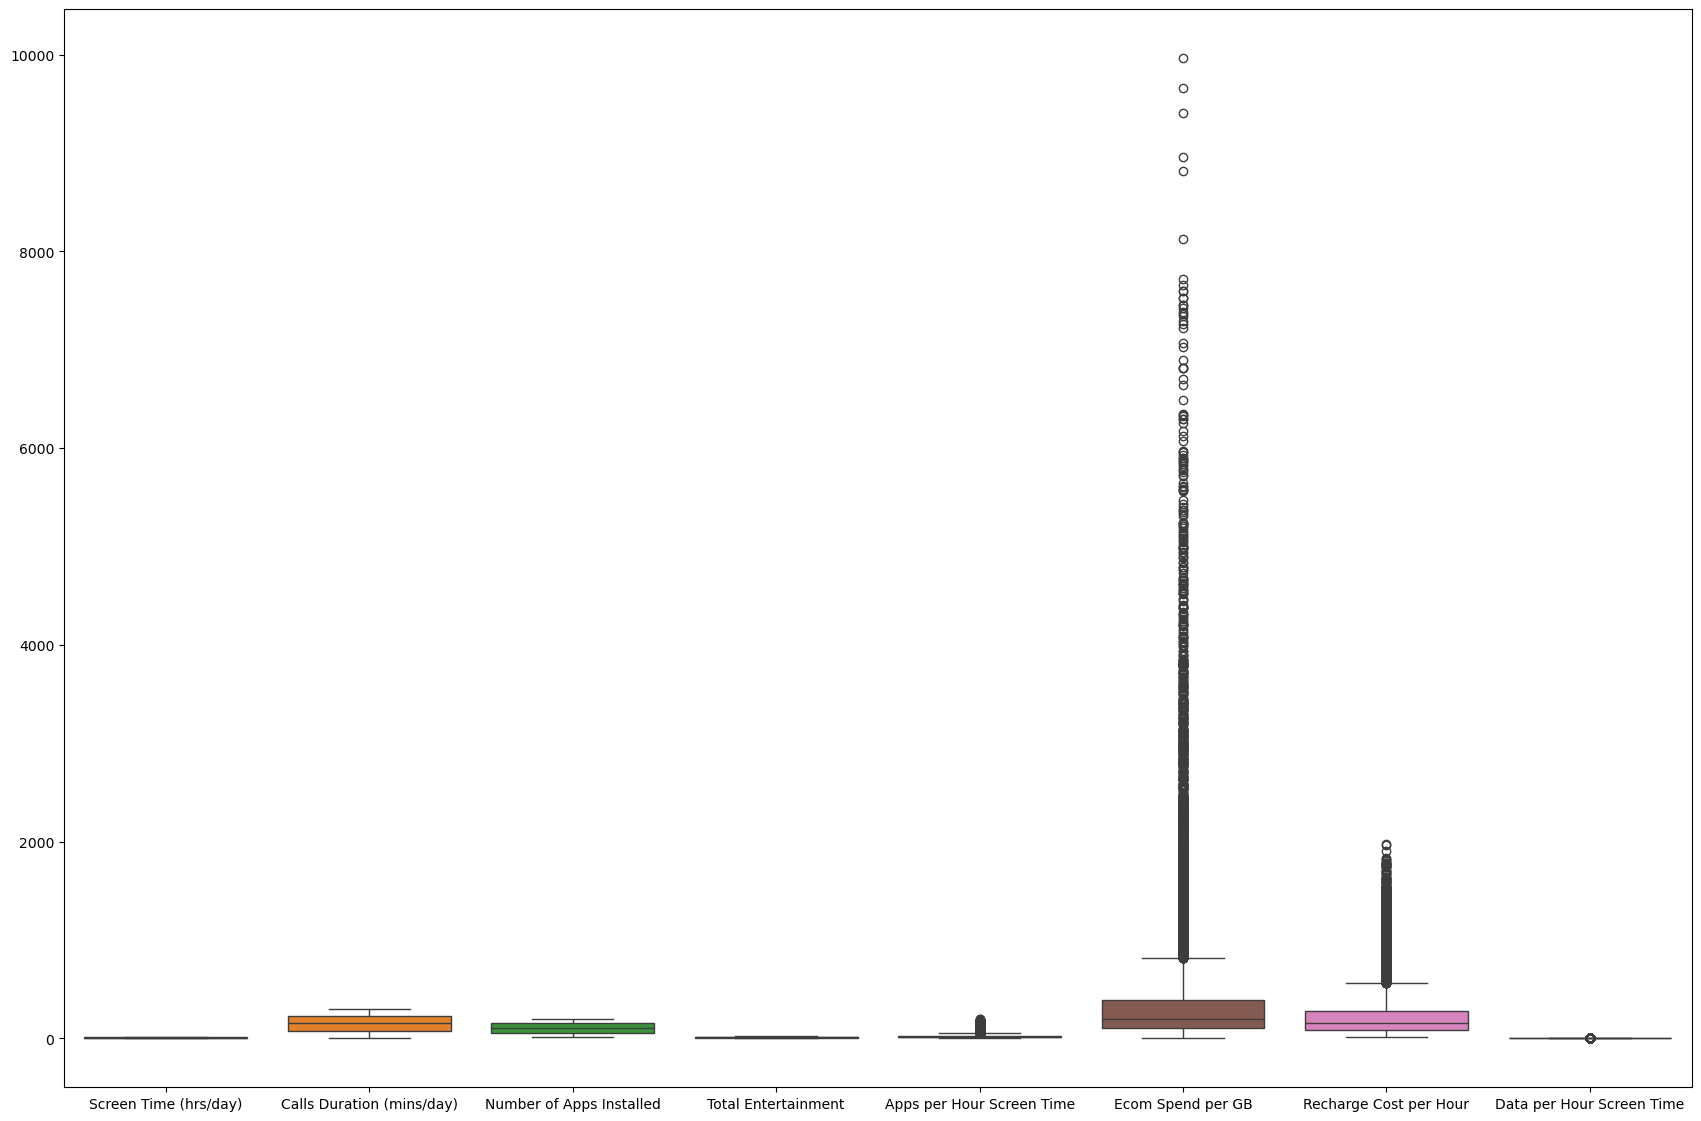

In [28]:
plt.figure(figsize=(21,14))
sns.boxplot(df)
plt.show()

<Axes: ylabel='Ecom Spend per GB'>

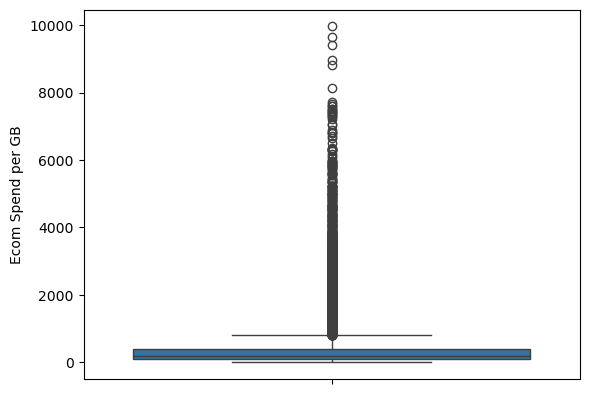

In [29]:
sns.boxplot(df['Ecom Spend per GB'])

<Axes: ylabel='Apps per Hour Screen Time'>

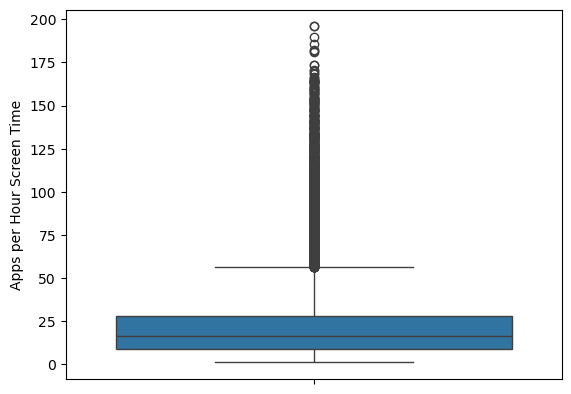

In [30]:
sns.boxplot(df['Apps per Hour Screen Time'])

In [31]:
#full check outliers 
def find_outliers(df):
    total_outliers = 0
    total_values = 0

    for col in df.select_dtypes(include='number').columns:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        lower_bound=q1-1.5*iqr
        upper_bound=q3+1.5*iqr
        
        outliers=df[(df[col]<lower_bound) | (df[col]>upper_bound)]
        outlier_count = len(outliers)
        value_count = df[col].count()

        total_outliers += outlier_count
        total_values += value_count
    percentage =(total_outliers/total_values)*100
    return total_outliers,percentage
total_outliers,percentage = find_outliers(df)
print(f"Number of outliers in the column : {total_outliers}")
print(f"Percentage of Outliers : {percentage}")

Number of outliers in the column : 6394
Percentage of Outliers : 4.519111161370576


In [32]:
# #column wise outlier detection
# def detect_outlier(df,column):
#     q1=df[column].quantile(0.25)
#     q3=df[column].quantile(0.75)
#     iqr=q3-q1
#     lower_bound=q1-1.5*iqr
#     upper_bound=q3+1.5*iqr
    
#     outliers=df[(df[column]<lower_bound) | (df[column]>upper_bound)]
#     outlier_count = len(outliers)
#     total_count = len(df[column])

#     percentage = (outlier_count/total_count)*100
#     return outlier_count,percentage
# outlier_count,percentage=detect_outlier(df,'Apps per Hour Screen Time')
# print(f"Number of outliers in the column : {outlier_count}")
# print(f"Percentage of Outliers : {percentage}")

In [33]:
# #removing the outliers
# def remove_outliers(df):
#     mask = pd.Series(True,index=df.index)
#     for col in df.select_dtypes(include='number').columns:
#         q1=df[col].quantile(0.25)
#         q3=df[col].quantile(0.75)
#         iqr=q3-q1
#         lower_bound=q1-1.5*iqr
#         upper_bound=q3+1.5*iqr
#         mask &=df[col].between(lower_bound,upper_bound)
#     return df[mask]
# df = remove_outliers(df)
# print(df)

In [34]:
df.columns

Index(['Gender', 'Phone Brand', 'OS', 'Screen Time (hrs/day)',
       'Calls Duration (mins/day)', 'Number of Apps Installed', 'Primary Use',
       'AgeGroup', 'Total Entertainment', 'Apps per Hour Screen Time',
       'Ecom Spend per GB', 'Recharge Cost per Hour',
       'Data per Hour Screen Time'],
      dtype='object')

In [37]:
df['OS'].value_counts()['iOS']

1775

In [38]:
df['Phone Brand'].value_counts()['Apple']

1775

In [39]:
corr_mat=df.corr(numeric_only=True)
print(corr_mat)

                           Screen Time (hrs/day)  Calls Duration (mins/day)  \
Screen Time (hrs/day)                   1.000000                  -0.015702   
Calls Duration (mins/day)              -0.015702                   1.000000   
Number of Apps Installed                0.004704                   0.009857   
Total Entertainment                    -0.022920                  -0.001748   
Apps per Hour Screen Time              -0.629622                   0.013081   
Ecom Spend per GB                      -0.001865                  -0.016442   
Recharge Cost per Hour                 -0.625944                   0.004540   
Data per Hour Screen Time              -0.613390                   0.005535   

                           Number of Apps Installed  Total Entertainment  \
Screen Time (hrs/day)                      0.004704            -0.022920   
Calls Duration (mins/day)                  0.009857            -0.001748   
Number of Apps Installed                   1.000000         

<Axes: >

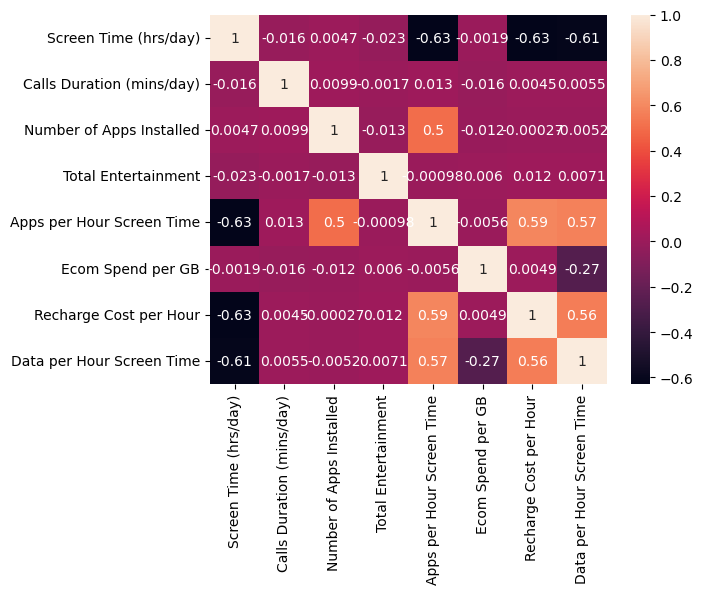

In [40]:
sns.heatmap(corr_mat,annot=True)

In [41]:
df=df[['Screen Time (hrs/day)',
       'Calls Duration (mins/day)', 'Number of Apps Installed', 'Primary Use',
       'AgeGroup', 'Total Entertainment','Gender','Phone Brand','OS']]


In [43]:
# from sklearn.feature_selection import RFE

# model=RandomForest()
# selector = RFE(model,n_features_to_select=5)
# selector = selector.fit(X_train,y_train)

# selected_features = X_train.columns[selector.support_]
# print("Selected Featuers",selected_features)

In [44]:
X = df.drop(columns=['Primary Use'])
y = df['Primary Use']

In [45]:
label_encoder = LabelEncoder()
y= label_encoder.fit_transform(df['Primary Use'])

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
categorical_cols = ['Gender','Phone Brand','OS','AgeGroup']
numerical_cols = df.select_dtypes(include = ['int64','float64']).columns.difference(categorical_cols)

preprocessor = ColumnTransformer([
    ("num",StandardScaler(),numerical_cols),
    ("cat",OneHotEncoder(handle_unknown='ignore'),categorical_cols)
])


In [48]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['Calls Duration (mins/day)', 'Number of Apps Installed',
       'Screen Time (hrs/day)', 'Total Entertainment'],
      dtype='object')),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'Phone Brand', 'OS', 'AgeGroup'])])

In [49]:
le = LabelEncoder()
y = le.fit_transform(y)

#saving 
with open('encoded_target.pkl','wb') as f:
    pickle.dump(le,f)

In [50]:
# def make_pipeline(model):
#     return Pipeline([
#         ('preprocessor',preprocessor),
#         ('clf',model)
#     ])
# models ={
#     "RandomForest":(RandomForestClassifier(random_state=40),{
#     'clf__n_estimators': [50, 100, 200],
#     'clf__criterion': ['gini', 'entropy', 'log_loss'],
#     'clf__max_depth': [None, 5, 10, 15],
#     'clf__min_samples_split':[2,5,10],
#     'clf__min_samples_leaf':[1,2,4],
#     'clf__max_features':['sqrt','log2'],
#     'clf__bootstrap':[True,False],
#     'clf__class_weight':[None,'balanced']
#     }),
#     "GradientBoostingClassifier":(GradientBoostingClassifier(random_state=40),{
#         'clf__learning_rate': [0.1, 0.02, 0.0001],
#         'clf__n_estimators': [50, 100, 200],
#         'clf__max_depth': [3, 5, 7],
#         'clf__min_samples_split':[2,5,10],
#         'clf__min_samples_leaf':[1,2,4],
#         'clf__subsample':[0.6,0.7,0.8,1.0],
#         'clf__max_features':['sqrt','log2']
        
#     }),
#     "Xgboost":(XGBClassifier(random_state=40),{
#     'clf__n_estimators': [100, 200, 300],       
#     'clf__max_depth': [3, 5, 7],               
#     'clf__learning_rate': [0.01, 0.1, 0.2],
#     'clf__subsample':[0.6,0.7,0.8,1.0],
#     'clf__colsample_bytree':[0.7,0.86,1.0],
#     'clf__reg_alpha':[0,1.5,2.3],
#     'clf__reg_lambda':[1,1.5,2,2.2],
#     'clf__scale_pos_weight':[1,2]
#     }) 

# }
# for name ,(model,params) in models.items():
#     pipeline = make_pipeline(model)
#     grid = GridSearchCV(pipeline,params,cv=5,verbose=1,n_jobs=-1)
#     grid.fit(X_train,y_train)

#     print(f"The best parameters for {name}:{grid.best_params_}")
#     print(f"The best score for {name}: {grid.best_score_:.4f}")

In [51]:
# Fitting 5 folds for each of 36 candidates, totalling 180 fits
# The best parameters for RandomForest:{'clf__criterion': 'entropy', 'clf__max_depth': 3, 'clf__n_estimators': 200,'clf__min_samples_split':3,
#                                      'clf__min_samples_leaf':4}
# The best score for RandomForest: 0.2002
# Fitting 5 folds for each of 27 candidates, totalling 135 fits
# The best parameters for GradientBoostingClassifier:{'clf__learning_rate': 0.1 , 'clf__n_estimators':200, ' clf__max_depth': 4}
# The best score for GradientBoostingClassifier: 0.2106
# Fitting 5 folds for each of 27 candidates, totalling 135 fits
# The best parameters for Xgboost:{'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 200}
# The best score for Xgboost: 0.2031

In [52]:
models = {
    'LogisticRegression': LogisticRegression(
        solver='liblinear',       
        penalty='l2',            
        C=1.0,                     
        class_weight='balanced',   
        max_iter=100             
    ),

    'RandomForestClassifier': RandomForestClassifier(
        n_estimators=200,        
        max_depth=10,           
        min_samples_split=5,      
        min_samples_leaf=3,      
        max_features='sqrt',    
        bootstrap=True, 
        class_weight='balanced_subsample', 
        random_state=42,       
        n_jobs=-1            
    ),

    'GradientBoostingClassifier': GradientBoostingClassifier(
        learning_rate=0.03,   
        n_estimators=300,         
        max_depth=4,        
        min_samples_split=4,      
        min_samples_leaf=2,      
        subsample=0.8,        
        max_features='sqrt',      
        random_state=42       
    ),

    'XGBClassifier': XGBClassifier(
        learning_rate=0.02,      
        n_estimators=350,       
        max_depth=5,       
        subsample=0.85,          
        colsample_bytree=0.8, 
        reg_alpha=0.5,           
        reg_lambda=1.0,        
        gamma=0.5,           
        eval_metric='logloss',  
        random_state=42,        
        n_jobs=-1             
    )
}
for name,model in models.items():
    pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier',model)
     ])
    pipeline.fit(X_train,y_train) #fitting
    #predicting
    y_pred = pipeline.predict(X_test)
    
    #evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    cls_rep=classification_report(y_test,y_pred)
    mat=confusion_matrix(y_test,y_pred)
    
    #saving
    model_path=f"{name}_pipeline.pkl"
    with open(model_path,'wb')as f:
     pickle.dump(pipeline,f)
    #getting the values
    print(f"{name} Accuracy: {acc:.4f}")
    print(f'{name} Report:\n{cls_rep}')
    print(f"{name} Confusion Matrix:\n{mat}")

LogisticRegression Accuracy: 0.2041
LogisticRegression Report:
              precision    recall  f1-score   support

           0       0.20      0.20      0.20       726
           1       0.20      0.26      0.23       697
           2       0.21      0.22      0.21       709
           3       0.21      0.14      0.17       726
           4       0.21      0.20      0.20       680

    accuracy                           0.20      3538
   macro avg       0.20      0.20      0.20      3538
weighted avg       0.20      0.20      0.20      3538

LogisticRegression Confusion Matrix:
[[146 172 169 106 133]
 [157 180 143  97 120]
 [161 180 157  98 113]
 [139 180 166 105 136]
 [133 189 122 102 134]]
RandomForestClassifier Accuracy: 0.2015
RandomForestClassifier Report:
              precision    recall  f1-score   support

           0       0.22      0.18      0.20       726
           1       0.19      0.24      0.21       697
           2       0.22      0.23      0.23       709
       

In [53]:
processed=preprocessor

In [54]:
y

array([0, 2, 1, ..., 1, 4, 2], dtype=int64)

In [55]:
X_processed = processed.fit_transform(df)

In [56]:
X_processed.shape

(17686, 23)

#### Clustering

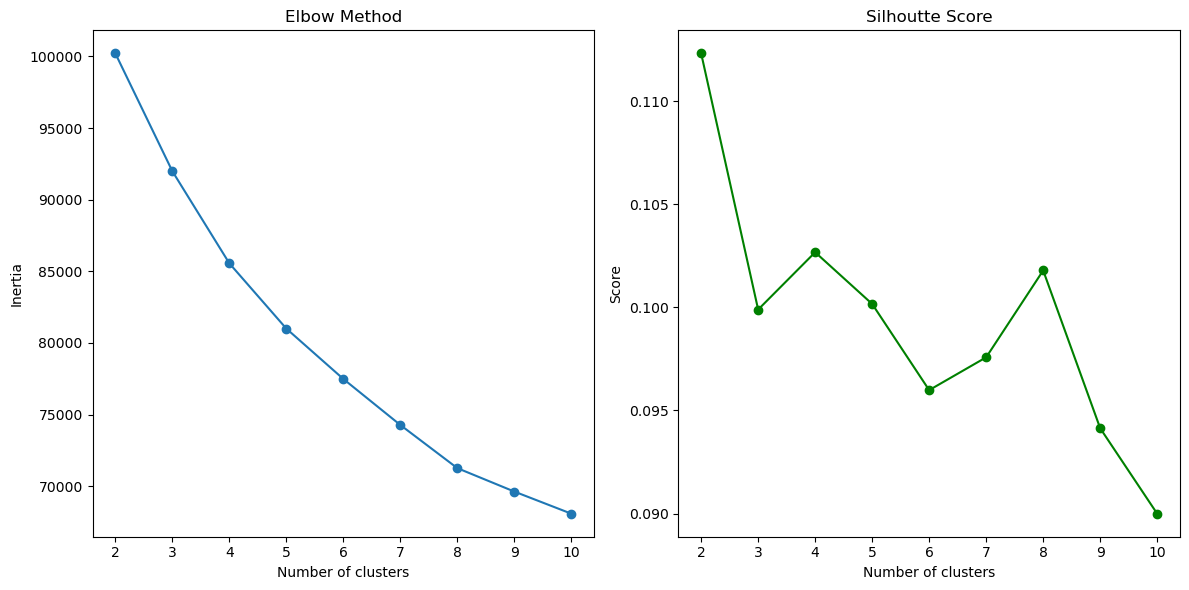

In [58]:
inertia = []
silhouette = []
K = range(2,11)

for k in K:
    kmeans = KMeans(n_clusters=k,random_state=42,n_init=10)
    labels = kmeans.fit_predict(X_processed)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_processed, labels))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(K,inertia,marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel('Inertia')

plt.subplot(1,2,2)
plt.plot(K,silhouette,marker='o',color='green')
plt.title("Silhoutte Score")
plt.xlabel("Number of clusters")
plt.ylabel('Score')
plt.tight_layout()
plt.show()

In [59]:
optimal_k=4
final_kmeans=KMeans(n_clusters=optimal_k,random_state=42,n_init=10)
cluster_labels=final_kmeans.fit_predict(X_processed)
df['CLuster']=cluster_labels

C:\Users\DELL\AppData\Local\Temp\ipykernel_20328\873325190.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CLuster']=cluster_labels


In [60]:
df['CLuster'].value_counts()

CLuster
2    4499
0    4428
1    4406
3    4353
Name: count, dtype: int64

In [61]:
cluster_profile=df.groupby("CLuster").mean(numeric_only=True)
print(cluster_profile)

         Screen Time (hrs/day)  Calls Duration (mins/day)  \
CLuster                                                     
0                     3.501152                 165.642615   
1                     6.203427                  71.843509   
2                     9.445521                 135.027184   
3                     6.994808                 234.382839   

         Number of Apps Installed  Total Entertainment  
CLuster                                                 
0                      147.455059            10.326739  
1                       57.942351            10.210440  
2                      149.953101             9.538186  
3                       61.296577             9.906984  


In [62]:
#PCA
pca=PCA()
pca.fit(X_processed)
cvr=np.cumsum(pca.explained_variance_ratio_)
print(cvr)

[0.16038544 0.31838796 0.4717568  0.62305187 0.68200531 0.73440818
 0.78592802 0.8295164  0.86300802 0.87896871 0.89484525 0.91068038
 0.92635744 0.94186427 0.95717958 0.9723534  0.98745991 1.
 1.         1.         1.         1.         1.        ]


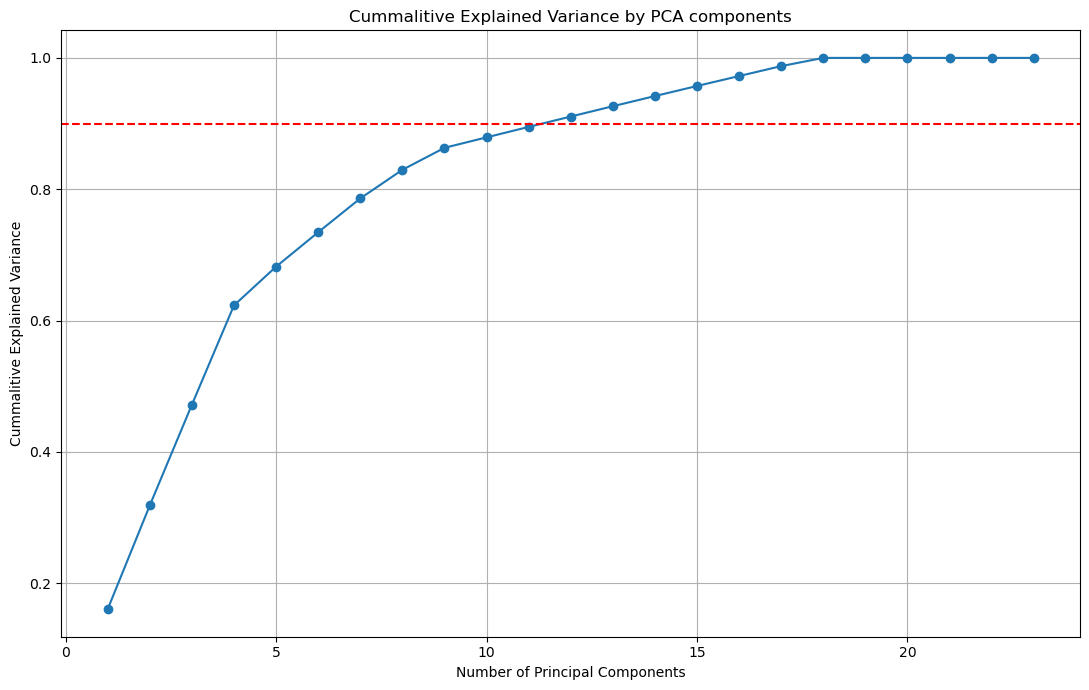

In [63]:
plt.figure(figsize=(11,7))
plt.plot(range(1,len(cvr)+1),cvr,marker='o')
plt.axhline(y=0.90,color='r',linestyle='--')
plt.title("Cummalitive Explained Variance by PCA components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cummalitive Explained Variance")
plt.grid(True)
plt.tight_layout()
plt.show()

In [64]:
n_components=np.argmax(cvr>=0.90)+1

In [65]:
pca_final=PCA(n_components=n_components)
pca_red=pca_final.fit_transform(X_processed)
print(f'Shape of PCA -reduced data:{pca_red.shape}')

Shape of PCA -reduced data:(17686, 12)


In [66]:
col_names = [f'PC_{i+1}' for i in range(n_components)]
pca_df = pd.DataFrame(pca_red, columns=col_names)

print(pca_df.head())

       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0 -1.000599 -0.953436  1.212085 -0.544669  0.685013 -0.197233  0.783676   
1  1.618630 -0.617240  1.371737 -0.396658 -0.125122 -0.535323 -0.589105   
2  0.224238 -0.471257  0.088325 -1.320889  0.690026  0.794291 -0.215829   
3  1.455498  0.196382  0.209544  0.764508 -0.696142 -0.175173  0.797763   
4 -1.462432  0.816832 -0.456215 -0.306223 -0.075978 -0.228370  0.820746   

       PC_8      PC_9     PC_10     PC_11     PC_12  
0 -0.197518 -0.199497 -0.140557  0.007214  0.791689  
1 -0.257828  0.948728 -0.030398  0.009998  0.040208  
2 -0.092218 -0.193284  0.887620 -0.119619 -0.148538  
3 -0.204156 -0.283161 -0.044120  0.026551  0.053451  
4 -0.203021  0.254442 -0.224817  0.664962 -0.429569  


In [67]:
explained_variance = pca_final.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

print("Explained variance ratio for each component:")
print(explained_variance)

print("\nCumulative explained variance:")
print(cumulative_variance)


Explained variance ratio for each component:
[0.16038544 0.15800252 0.15336884 0.15129507 0.05895344 0.05240287
 0.05151984 0.04358838 0.03349163 0.01596069 0.01587654 0.01583513]

Cumulative explained variance:
[0.16038544 0.31838796 0.4717568  0.62305187 0.68200531 0.73440818
 0.78592802 0.8295164  0.86300802 0.87896871 0.89484525 0.91068038]


C:\Users\DELL\AppData\Local\Temp\ipykernel_20328\1159890117.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_red[:,0],pca_red[:,1],cmap='virdis',alpha=0.7)


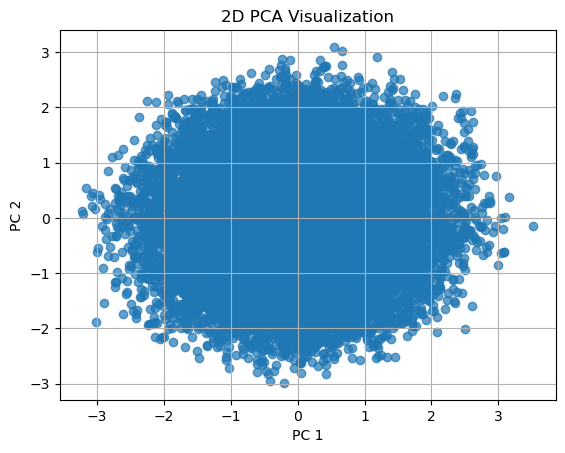

In [68]:
plt.scatter(pca_red[:,0],pca_red[:,1],cmap='virdis',alpha=0.7)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title('2D PCA Visualization')
plt.grid(True)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_20328\78859136.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_red[:,3],pca_red[:,4],cmap='virdis',alpha=0.7)


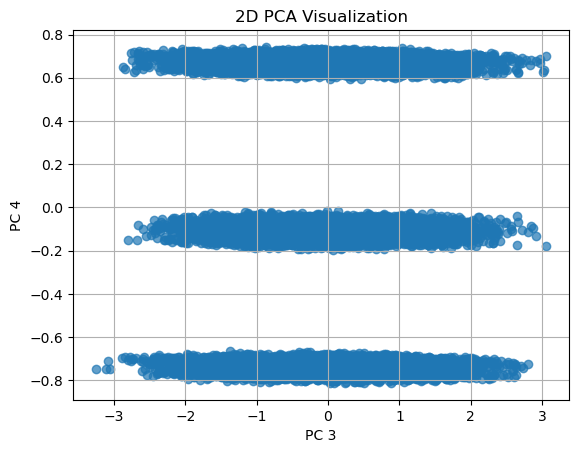

In [69]:
plt.scatter(pca_red[:,3],pca_red[:,4],cmap='virdis',alpha=0.7)
plt.xlabel("PC 3")
plt.ylabel("PC 4")
plt.title('2D PCA Visualization')
plt.grid(True)
plt.show()

In [75]:
y = label_encoder.fit_transform(df['Primary Use'])

In [77]:
kmeans=KMeans(n_clusters=4)
pca_df["KMeans_Labels"] = kmeans.fit_predict(pca_df)

In [87]:
agglo=AgglomerativeClustering(n_clusters=4)
pca_df["Agglo_Labels"] = agglo.fit_predict(pca_df)
with open ('agglo.pkl','wb') as f:
    pickle.dump(pca_df,f)

In [80]:
dbscan=DBSCAN(eps=2,min_samples=5)
pca_df['DBSCAN_Labels']=dbscan.fit_predict(pca_df)

In [107]:
gmm=GaussianMixture(n_components=4,covariance_type='full')
pca_df['Gaussian_label'] = gmm.fit_predict(pca_df)
with open ('Gaussian_label.pkl','wb') as f:
    pickle.dump(pca_df,f)

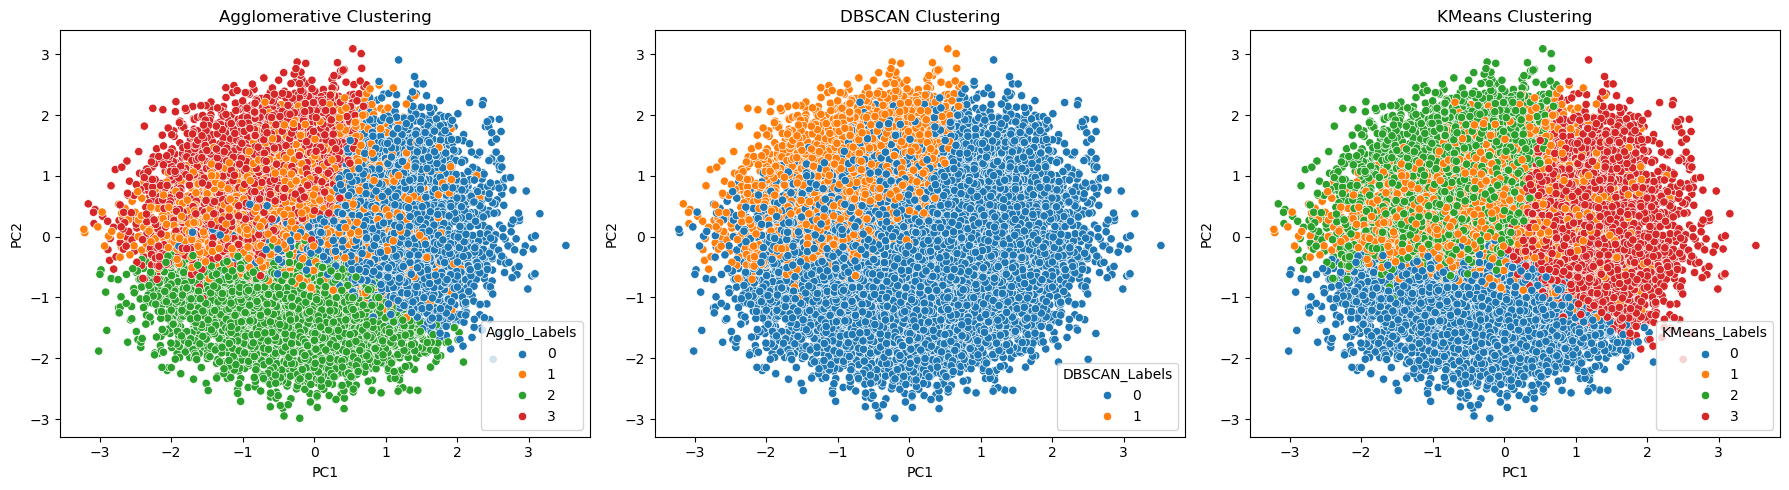

In [81]:
fig,axes=plt.subplots(1,3,figsize=(18,5))
sns.scatterplot(data=pca_df,x='PC1',y='PC2',hue='Agglo_Labels',palette='tab10',ax=axes[0])
axes[0].set_title("Agglomerative Clustering")

sns.scatterplot(data=pca_df,x='PC1',y='PC2',hue='DBSCAN_Labels',palette='tab10',ax=axes[1])
axes[1].set_title("DBSCAN Clustering")
plt.tight_layout()

sns.scatterplot(data=pca_df,x='PC1',y='PC2',hue='KMeans_Labels',palette='tab10',ax=axes[2])
axes[2].set_title("KMeans Clustering")
plt.tight_layout()

plt.show()

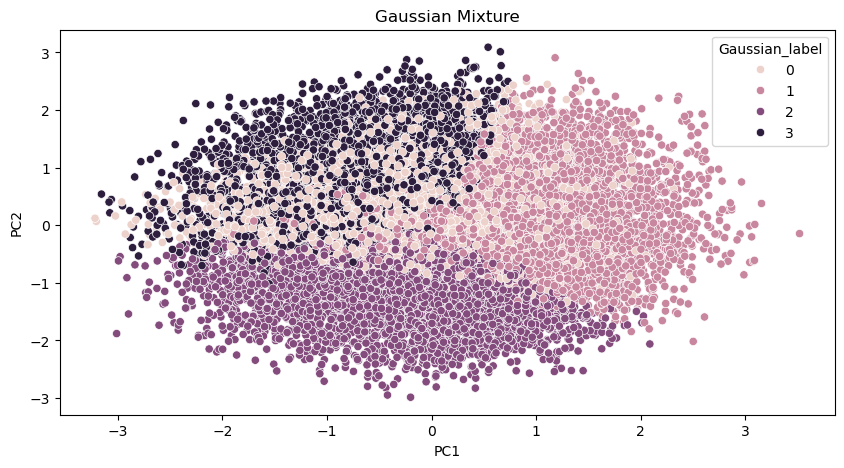

In [103]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=pca_df,x='PC1',y='PC2',hue='Gaussian_label')
plt.title('Gaussian Mixture')
plt.show()

In [82]:
print("KMeans Silhouette Score",silhouette_score(pca_df.iloc[:,:13],pca_df['KMeans_Labels']))
print("Agglomerative Silhouette Score",silhouette_score(pca_df.iloc[:,:13],pca_df['Agglo_Labels']))
print("DBSCAN Silhouette Score",silhouette_score(pca_df.iloc[:,:13],pca_df['DBSCAN_Labels']))                                                                     

KMeans Silhouette Score 0.4414853930264254
Agglomerative Silhouette Score 0.4779697331774148
DBSCAN Silhouette Score 0.2943052297348137


In [105]:
print("Gaussian Mixture Silhouette Score",silhouette_score(pca_df.iloc[:,:13],pca_df['Gaussian_label']))       

Gaussian Mixture Silhouette Score 0.5554947819933378
